# Python - Visualization

The most widely used data visualization library is ```matplotlib```. It was originally created by John Hunter, a neurobiologist, to visualize ECoGs. Much like MATLAB, ```matplotlib``` makes it very easy for non-programmers to quickly and easily generate graphics.

The architecture of ```matplotlib``` is composed of three layers:

**The back-end layer** is comprised of three built-in low level classes: FigureCanvas, Renderer and Event.

**The artist layer** contains one main object: Artist. All visual elements are an Artist instance (either primitive or composite type). The axes are the most important instance of type composite because that is where most of the API plotting methods are defined. 

**The scripting layer** was developed for non-programmers to perform quick exploratory data analysis. Users interact with this layer via the ```matplotlib.pyplot``` interface.

In [31]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel("assets/canada.xlsx", sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Data Cleaning & Preparation

In [20]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis=1)
years = list(map(str, range(1980, 2014)))

In [34]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### Plotting with Pandas

#### Line

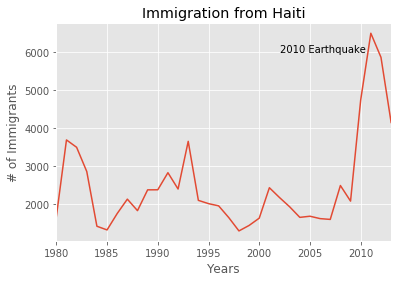

In [54]:
haiti_df = df.loc["Haiti", years]
haiti_df.index = haiti_df.index.map(int)

haiti_df.transpose().plot(kind="line")

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("# of Immigrants")
plt.text(2002, 6000, "2010 Earthquake")

plt.show()

#### Area

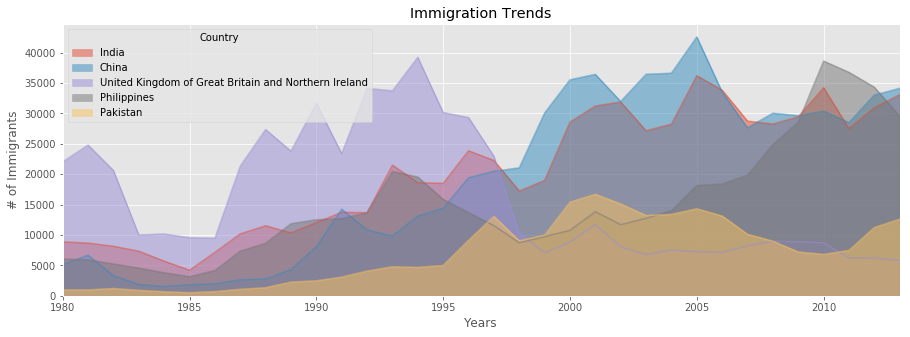

In [56]:
top_5_df = df.sort_values("Total", ascending=False).head()
top_5_df = top_5_df[years].transpose()

top_5_df.plot(kind="area", stacked=False, figsize=(15, 5)) # Defaults to stacked=True

plt.title("Immigration Trends")
plt.xlabel("Years")
plt.ylabel("# of Immigrants")

plt.show()